In [ ]:
import os
import numpy as np
import pandas as pd
#import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [32]:
## Importação dos datasets

data = pd.read_csv(r"C:\TCC\Datasets\data.csv", delimiter =',', encoding='latin-1')
data_genero = pd.read_csv(r"C:\TCC\Datasets\data_by_genres.csv", delimiter =',', encoding='latin-1')
data_ano = pd.read_csv(r"C:\TCC\Datasets\data_by_year.csv", delimiter =',', encoding='latin-1')

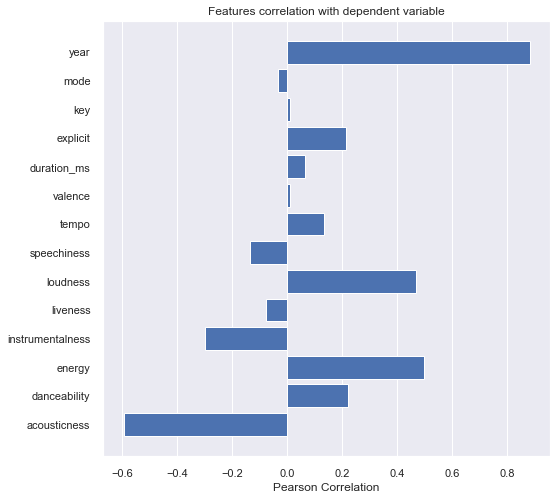

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [33]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

x, y = data[feature_names], data['popularity']

## Criando uma lista de atributos
features = np.array(feature_names)

## Gráfico
graph_corr = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(8,8)
graph_corr.fit(x, y)
graph_corr.show()

<AxesSubplot:xlabel='decade', ylabel='count'>

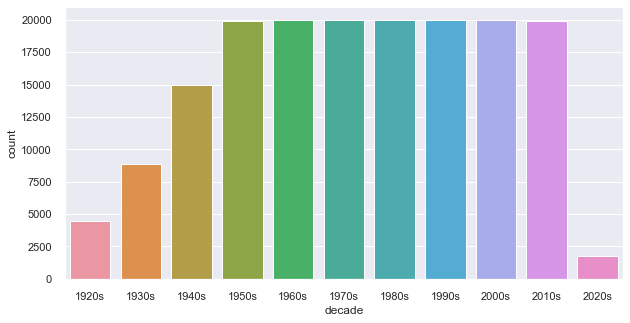

In [40]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(10 ,5)})
sns.countplot(data['decade'])

In [36]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(data_ano, x='year', y=sound_features)
fig.show()

In [42]:
top10_genero = data_genero.nlargest(10, 'popularity')

fig = px.bar(top10_genero, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [45]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])
X = data_genero.select_dtypes(np.number)
cluster_pipeline.fit(X)
data_genero['cluster'] = cluster_pipeline.predict(X)

In [47]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = data_genero['genres']
projection['cluster'] = data_genero['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2664 samples in 0.010s...
[t-SNE] Computed neighbors for 2664 samples in 0.316s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2664
[t-SNE] Computed conditional probabilities for sample 2000 / 2664
[t-SNE] Computed conditional probabilities for sample 2664 / 2664
[t-SNE] Mean sigma: 0.792505
[t-SNE] Computed conditional probabilities in 0.140s
[t-SNE] Iteration 50: error = 80.6187820, gradient norm = 0.0196737 (50 iterations in 1.469s)
[t-SNE] Iteration 100: error = 75.4802322, gradient norm = 0.0053429 (50 iterations in 1.048s)
[t-SNE] Iteration 150: error = 75.2409058, gradient norm = 0.0032986 (50 iterations in 0.977s)
[t-SNE] Iteration 200: error = 75.1768799, gradient norm = 0.0017613 (50 iterations in 1.061s)
[t-SNE] Iteration 250: error = 75.1285553, gradient norm = 0.0013969 (50 iterations in 1.433s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.128555
[t-SNE] Iteration 300: erro